In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
# this csv file has an evaluation of SpO2 and r-r values
df = pd.read_csv("/home/mohit/Documents/new2.csv")


In [3]:
df.head()

,SpO2,SelDuration
0,97.3036,0.793
1,97.3044,0.796
2,97.3048,0.801
3,97.3037,0.850
4,97.3038,0.857


In [4]:
#summarize the data
df.describe()

,SpO2,SelDuration
count,5111.000000,5111.000000
mean,91.979136,0.755906
std,4.766842,0.062946
min,81.240600,0.583000
25%,89.273300,0.712000
50%,93.290100,0.759000
75%,96.301700,0.798000
max,97.306600,1.409000


In [5]:
cdf = df[['SpO2','SelDuration']]
cdf.head(5)

,SpO2,SelDuration
0,97.3036,0.793
1,97.3044,0.796
2,97.3048,0.801
3,97.3037,0.850
4,97.3038,0.857


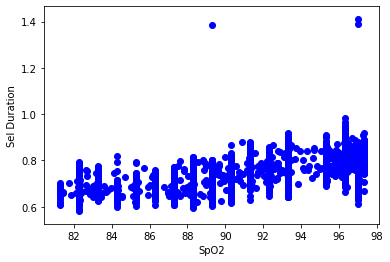

In [6]:
#graph of SpO2 vs r-r values

plt.scatter(cdf.SpO2, cdf.SelDuration,color='blue')
plt.xlabel('SpO2')
plt.ylabel('Sel Duration')
plt.show()

In [7]:
#splitting our data in 80-20 ratio

In [8]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

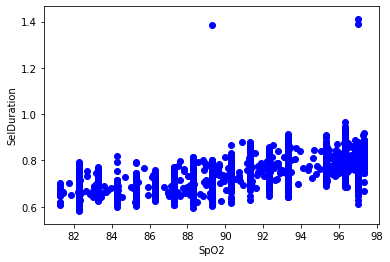

In [9]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SpO2, train.SelDuration,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("SelDuration")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['SelDuration']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0090384]]
Intercept:  [-0.07542223]


Text(0, 0.5, 'SelDuration')

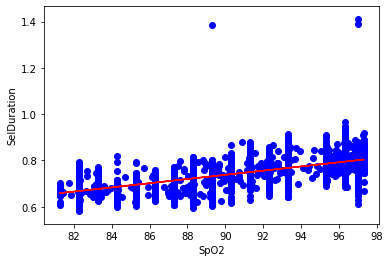

In [12]:
plt.scatter(train.SpO2, train.SelDuration,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("SelDuration")

In [14]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['SelDuration']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.02


In [15]:
#using polynomial regression

In [17]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['SelDuration']])

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['SelDuration']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 9.73036000e+01, 9.46799057e+03],
       [1.00000000e+00, 9.73044000e+01, 9.46814626e+03],
       [1.00000000e+00, 9.73048000e+01, 9.46822410e+03],
       ...,
       [1.00000000e+00, 9.73054000e+01, 9.46834087e+03],
       [1.00000000e+00, 9.73063000e+01, 9.46851602e+03],
       [1.00000000e+00, 9.73058000e+01, 9.46841871e+03]])

In [18]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.02045361  0.00016329]]
Intercept:  [1.25205547]


Text(0, 0.5, 'selduration')

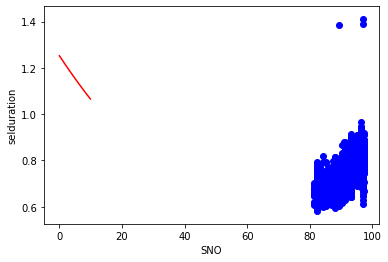

In [19]:
#plotting the polynomial regression
plt.scatter(train.SpO2, train.SelDuration,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("SNO")
plt.ylabel("selduration")

In [20]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.02
